In [1]:
import pandas as pd
import json
import numpy as np

In [2]:
judgements = pd.read_json('file.json', lines='true')

In [3]:
judgements.head()

,id,text,annotations,meta,annotation_approver
0,1030,DLCT010001392013 - STATE vs KAMAL KANT THUKRAL...,"[{'label': 49, 'start_offset': 735, 'end_offse...","{'date_of_filing': '2013-05-29', 'cino': 'DLCT...",urmi
1,1031,DLCT010148262017 - STATE vs RAJENDER KUMAR - D...,"[{'label': 54, 'start_offset': 1179, 'end_offs...","{'date_of_filing': '2017-10-11', 'cino': 'DLCT...",urmi
2,1032,DLCT010160782016 - STATE vs Mohd. Nasir @ Same...,"[{'label': 49, 'start_offset': 458, 'end_offse...","{'date_of_filing': '2014-01-09', 'cino': 'DLCT...",urmi
3,1033,DLCT010032722015 - STATE vs MD. NADEEM - Distr...,"[{'label': 62, 'start_offset': 5141, 'end_offs...","{'date_of_filing': '2015-10-20', 'cino': 'DLCT...",urmi
4,1034,DLCT010052902016 - STATE vs IRSHAD @ CHOTU - D...,"[{'label': 50, 'start_offset': 525, 'end_offse...","{'date_of_filing': '2016-02-19', 'cino': 'DLCT...",urmi


In [4]:
df = pd.DataFrame({
      col:np.repeat(judgements[col].values, judgements['annotations'].str.len())
      for col in judgements.columns.drop('annotations')}
    ).merge(pd.Series(np.concatenate(judgements['annotations'].values)).apply(pd.Series) , left_index=True, right_index=True)

In [5]:
annotations = pd.Series(np.concatenate(judgements['annotations'].values)).apply(pd.Series)

In [56]:
df.to_csv('checkpoint1.csv')

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.style.use('ggplot')
%matplotlib inline

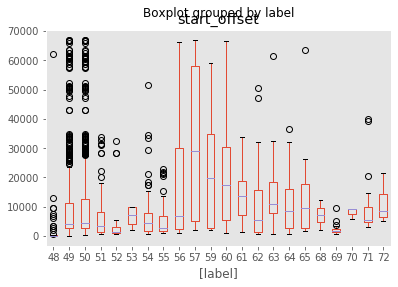

In [57]:
df.boxplot(by=['label'],column=['start_offset'], grid=False)

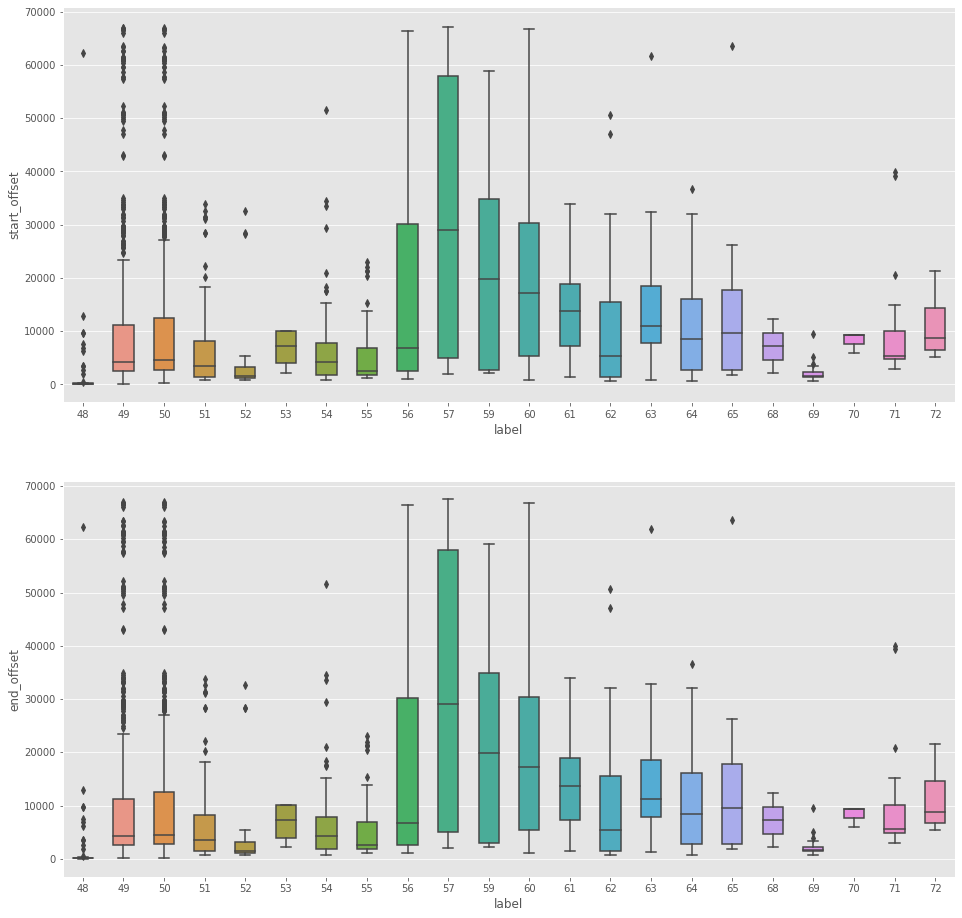

In [58]:
fig, ax = plt.subplots(2, 1, sharey=True, figsize=(16,16));
sns.boxplot(x='label', data=df, y = 'start_offset', width = 0.5, ax=ax[0])
sns.boxplot(x='label', data=df, y = 'end_offset', width = 0.5, ax=ax[1])


The above plor shows labels 48 and 69 have smaller varience and positional features can be used as one of the factors in automaticaly identifying the target values. Also 48 and 69 are always towards the start of the document while label 70 is at around 10k letters after the start of the document. lbel 52 though with higher varience is mostly at the start of the document.

In [59]:
df['label_value'] = df.apply(lambda x: x['text'][x['start_offset']:x['end_offset']], axis=1)

In [60]:
df['label_length'] = df.apply(lambda x: x['end_offset'] - x['start_offset'], axis=1)

In [61]:
df.head()

,id,text,meta,annotation_approver,label,start_offset,end_offset,user,label_value,label_length
0,1030,DLCT010001392013 - STATE vs KAMAL KANT THUKRAL...,"{'date_of_filing': '2013-05-29', 'cino': 'DLCT...",urmi,49,735,738,1,IPC,3
1,1030,DLCT010001392013 - STATE vs KAMAL KANT THUKRAL...,"{'date_of_filing': '2013-05-29', 'cino': 'DLCT...",urmi,50,743,760,1,Section 10 and 12,17
2,1030,DLCT010001392013 - STATE vs KAMAL KANT THUKRAL...,"{'date_of_filing': '2013-05-29', 'cino': 'DLCT...",urmi,50,2530,2541,1,Section 164,11
3,1030,DLCT010001392013 - STATE vs KAMAL KANT THUKRAL...,"{'date_of_filing': '2013-05-29', 'cino': 'DLCT...",urmi,49,2542,2546,1,CrPC,4
4,1030,DLCT010001392013 - STATE vs KAMAL KANT THUKRAL...,"{'date_of_filing': '2013-05-29', 'cino': 'DLCT...",urmi,50,2595,2606,1,Section 161,11


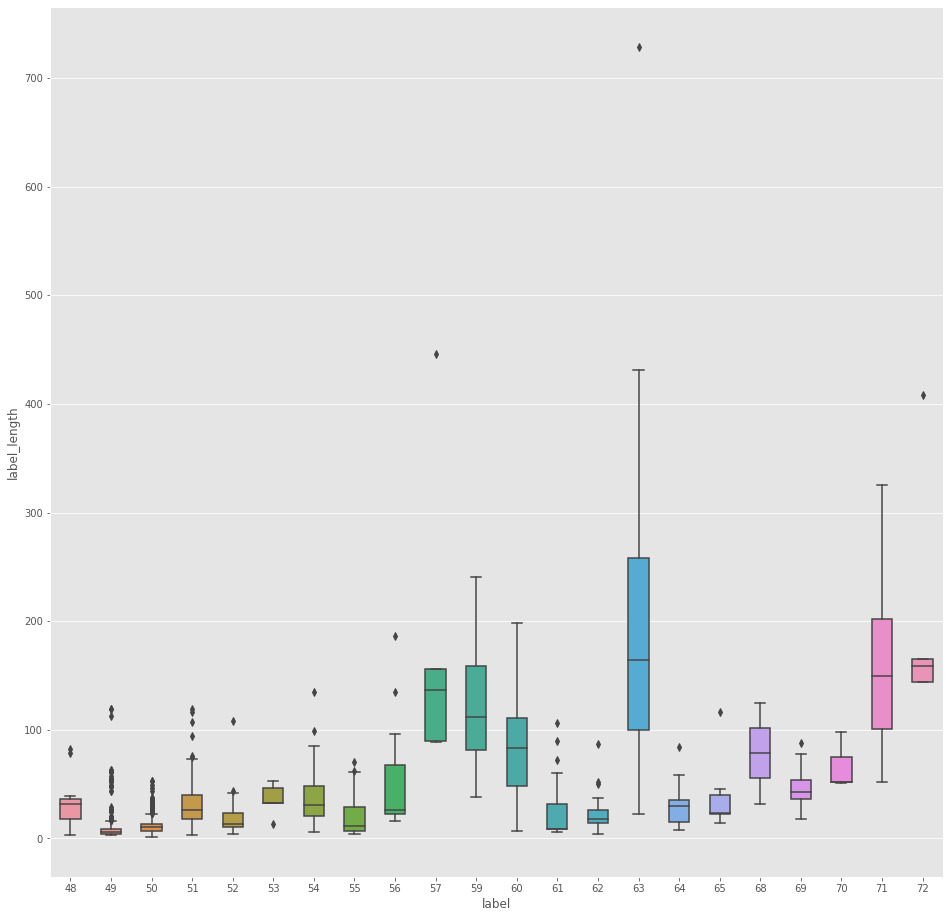

In [65]:
fig, ax = plt.subplots(1, 1, sharey=True, figsize=(16,16));
sns.boxplot(x='label', data=df, y = 'label_length', width = 0.5, ax=ax)


Length of label 49 not varying much

In [67]:
df.to_csv('checkpoint2.csv')

In [86]:
df[df['label']==49]['label_value'].str.replace('\n', '').str.replace(' ', '').unique()

array(['IPC', 'CrPC', 'POCSOAct2012', 'POCSOAct', 'Cr.PC', 'Cr.P.C.',
       'Cr.P.C', 'POCSO', 'POCSOAct,', 'IndianEvidenceAct',
       'ProtectionofChildrenfromSexualOffencesAct,2012', 'EvidenceAct',
       'POCSOACT', 'thePOCSOAct', 'Cr.P.C,', 'cr.p.c', 'POCSOAct.',
       'u/s6', 'IndianPenalCode(IPC)',
       'POCSO(ProtectionofChildrenfromSexualOffences)Act,2012',
       'TheProtectionofChildrenfromSexualOffencesAct,2012',
       'ProtectionofChildfromSexualOffencesAct',
       'ProtectionofChildrenfromSexualOffences(POCSO)Act', 'I.P.C.',
       'I.P.C', 'POCSOAct,2012', 'section6', 'POCSOAc',
       'IndianPenalCode,1860', 'Cr.PC,',
       'heProtectionofChildrenfromSexualOffencesAct,2012',
       'IndianEvidenceAct,1872',
       'ProtectionofChildrenfromSexualOffences,Act', 'Section30',
       'ProtectionofChildrenfromSexuallyOffencesAct',
       'TheProtectionSectionofChildrenfromSexualOffencesAct,2012',
       'CodeofCriminalProcedure', 'IndianPenalCode',
       'Protectionof

Label 49 has a finate set of values. Rule based checks can be used to extract the values of the label

In [88]:
df[df['label']==62]['label_value'].str.replace('\n', '').str.replace(' ', '').unique()

array(['sexualharassment', 'penetrativesexualassault', 'sexualassault',
       'repeatedpenetrativesexualassault', 'rape', 'sexuallyharassed',
       'aggravatedpenetrativesexualassault', 'molestation',
       'sexuallyassaulted', 'sexualassaultandsexualharassment',
       'sexualassault/sexualharassment', 'SexualAssault',
       'aggravatedsexualassault', 'committedpenetrativesexualassault',
       'afterpullingdownhersalwar,insertedhisfingerintohervaginaandkissedher',
       'AggravatedSexualAssault', 'sodomy', 'PenetrativeSexualAssault',
       'AggravatedPenetrativeSexualAssault', "sexualassault'",
       'prosecutrixwassexuallyassaulted', 'aggravativesexualassault'],
      dtype=object)